<a href="https://colab.research.google.com/github/KOWSALYAAARU/test_app/blob/main/Student_Performance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [19]:
df=pd.read_csv('StudentsPerformance.csv')

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
df.shape

(1000, 8)

In [22]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [26]:
print("Categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [27]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"]

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


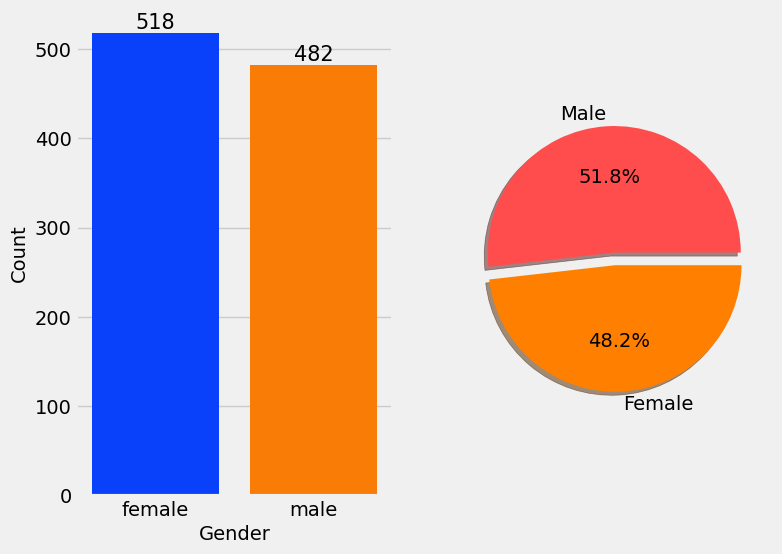

In [29]:
# Create a figure with two subplots
f,ax=plt.subplots(1,2,figsize=(8,6))


# Create a countplot of the 'gender' column and add labels to the bars
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Gender', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a pie chart of the 'gender' column and add labels to the slices
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize': 14})

# Display the plot
plt.show()

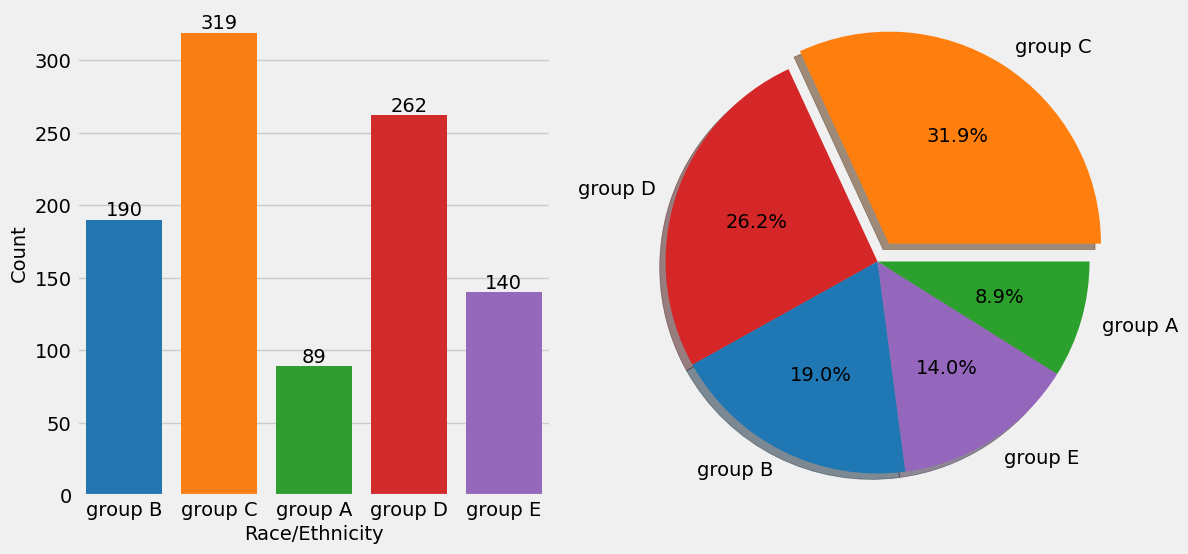

In [30]:
# Define a color palette for the countplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
# blue, orange, green, red, purple are respectiively the color names for the color codes used above

# Create a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create a countplot of the 'race/ethnicity' column and add labels to the bars
sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Race/Ethnicity', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a dictionary that maps category names to colors in the color palette
color_dict = dict(zip(df['race/ethnicity'].unique(), colors))

# Map the colors to the pie chart slices
pie_colors = [color_dict[race] for race in df['race/ethnicity'].value_counts().index]

# Create a pie chart of the 'race/ethnicity' column and add labels to the slices
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=pie_colors, textprops={'fontsize': 14})

# Set the aspect ratio of the pie chart to 'equal' to make it a circle
plt.axis('equal')

# Display the plot
plt.show()


Most of the student belonging from group C /group D.
Lowest number of students belong to group A.


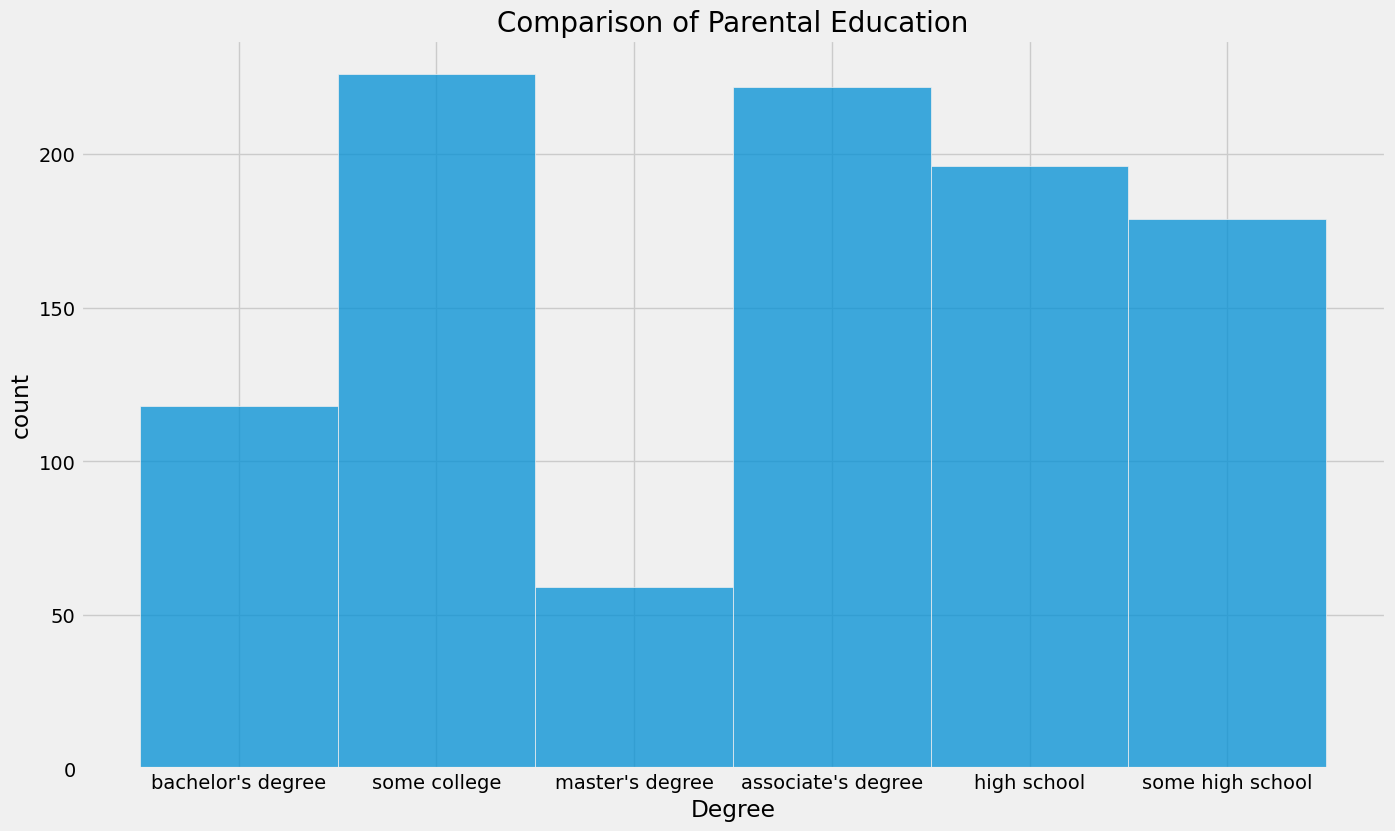

In [31]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.histplot(df["parental level of education"], palette = 'pink')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<function matplotlib.pyplot.axis(arg: 'tuple[float, float, float, float] | bool | str | None' = None, /, *, emit: 'bool' = True, **kwargs) -> 'tuple[float, float, float, float]'>

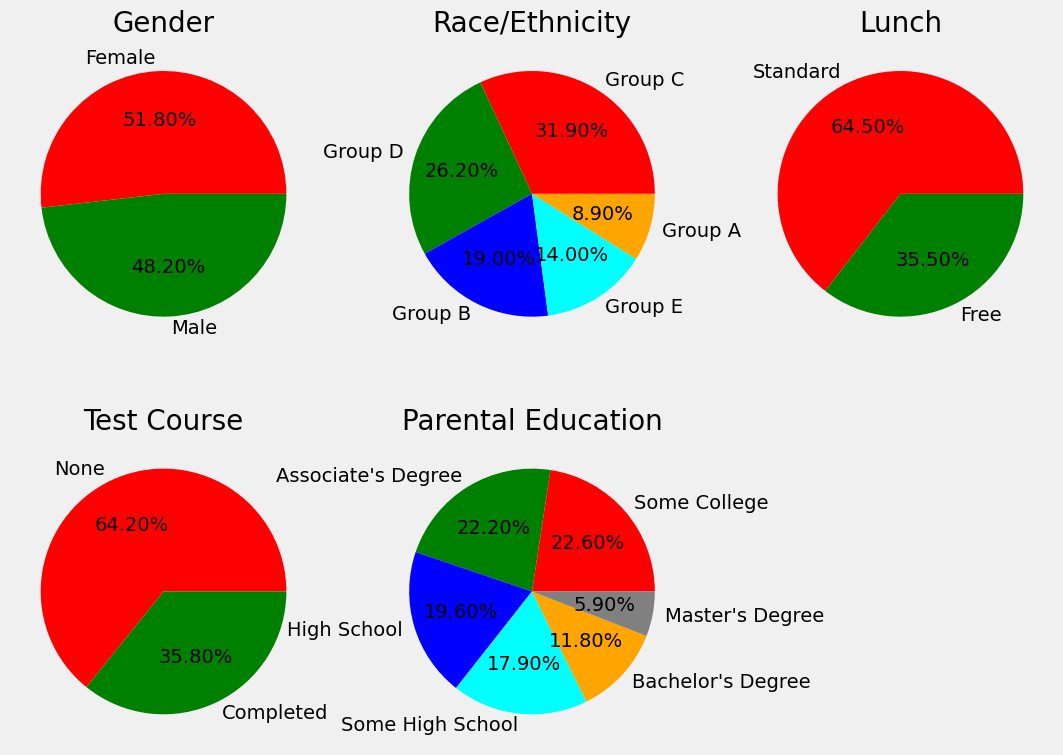

In [35]:
# Set figure size
plt.rcParams['figure.figsize'] = (12, 9)

# First row of pie charts
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Second row of pie charts
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis